## Cargar los modelos

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import roc_auc_score, accuracy_score
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_files 
from keras.preprocessing import image
import seaborn as sns

In [2]:
resnet_model = tf.keras.models.load_model('modelos/resnet_model_equilibrado')
xception_model = tf.keras.models.load_model('modelos/xception_model_equilibrado')
efficient_model = tf.keras.models.load_model('modelos/efficient_model_equilibrado')
inceptionResNet_model = tf.keras.models.load_model('modelos/inceptionResNet_model_equilibrado')
denseNet_model = tf.keras.models.load_model('modelos/denseNet_model_equilibrado')

2022-04-12 20:20:23.443056: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Para hacer después, código para mostrar imágenes y sus predicciones:

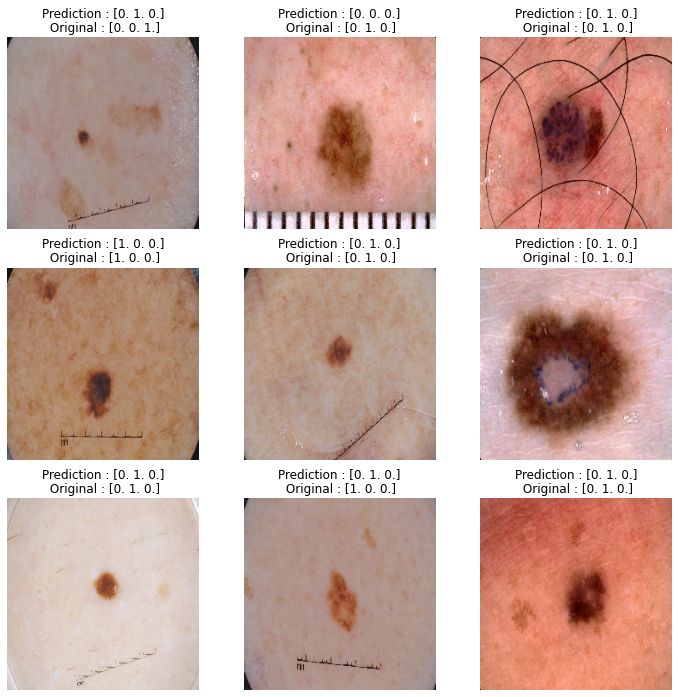

In [5]:
# visualizing the prediting image
plt.figure(figsize=(12,12))

for i in range(9):
  image, label = test_data.next()

  resnet_model_prediction = inceptionResNet_model.predict(image)
  
  plt.subplot(3,3,i+1)

  plt.imshow(image[i])
  plt.title(f"Prediction : {tf.round(resnet_model_prediction[i])}\n Original : {label[i]}")
  plt.axis("off")

In [10]:
resnet_model_prediction[1]

array([0.36657208, 0.54311067, 0.09031729], dtype=float32)

# Evaluación de los modelos

In [2]:
test_dir = "/Users/inma/Desktop/tfg/datos_equilibrados/test"
test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
test_data = test_gen.flow_from_directory(test_dir,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           batch_size = 64
                                          )

Found 549 images belonging to 3 classes.


In [3]:
resnet_model_evaluation = resnet_model.evaluate(test_data)
xception_model_evaluation = xception_model.evaluate(test_data)
efficient_model_evaluation = efficient_model.evaluate(test_data)
inceptionResNet_model_evaluation = inceptionResNet_model.evaluate(test_data)
denseNet_model_evaluation = denseNet_model.evaluate(test_data)

9/9 [==============================] - 207s 22s/step - loss: 0.8167 - accuracy: 0.6940


In [4]:
resnet_model_evaluation

[0.9223996996879578, 0.6848816275596619]

#### Guardar resultados

In [5]:
pickle.dump(resnet_model_evaluation, open('variablesGuardadas/testEquilibrado/resnet_model_evaluation.pkl', 'wb'))
pickle.dump(xception_model_evaluation, open('variablesGuardadas/testEquilibrado/xception_model_evaluation.pkl', 'wb'))
pickle.dump(efficient_model_evaluation, open('variablesGuardadas/testEquilibrado/efficient_model_evaluation.pkl', 'wb'))
pickle.dump(inceptionResNet_model_evaluation, open('variablesGuardadas/testEquilibrado/inceptionResNet_model_evaluation.pkl', 'wb'))
pickle.dump(denseNet_model_evaluation, open('variablesGuardadas/testEquilibrado/denseNet_model_evaluation.pkl', 'wb'))

#### Cargar datos

In [3]:
resnet_model_evaluation = pickle.load(open('variablesGuardadas/testEquilibrado/resnet_model_evaluation.pkl', 'rb'))
xception_model_evaluation = pickle.load(open('variablesGuardadas/testEquilibrado/xception_model_evaluation.pkl', 'rb'))
efficient_model_evaluation = pickle.load(open('variablesGuardadas/testEquilibrado/efficient_model_evaluation.pkl', 'rb'))
inceptionResNet_model_evaluation = pickle.load(open('variablesGuardadas/testEquilibrado/inceptionResNet_model_evaluation.pkl', 'rb'))
denseNet_model_evaluation = pickle.load(open('variablesGuardadas/testEquilibrado/denseNet_model_evaluation.pkl', 'rb'))

### Comparación - Métricas de evaluación

#### 1. Accuracy

In [4]:
print(f"Resnet Model Accuarcy : {resnet_model_evaluation[1] *100 : 0.2f}%")
print(f"Xception Model Accuarcy : {xception_model_evaluation[1] *100 : 0.2f}%")
print(f"Efficient Model Accuarcy : {efficient_model_evaluation[1] *100 : 0.2f}%")
print(f"InceptionResNet Model Accuarcy : {inceptionResNet_model_evaluation[1] *100 : 0.2f}%")
print(f"DenseNet Model Accuarcy : {denseNet_model_evaluation[1] *100 : 0.2f}%")

Resnet Model Accuarcy :  68.49%
Xception Model Accuarcy :  70.31%
Efficient Model Accuarcy :  67.03%
InceptionResNet Model Accuarcy :  71.58%
DenseNet Model Accuarcy :  69.40%


Los resultados son mejores.

#### 2. Test Loss

In [5]:
print(f"Resnet Model TestLoss : {resnet_model_evaluation[0] *100 : 0.2f}%")
print(f"Xception Model TestLoss : {xception_model_evaluation[0] *100 : 0.2f}%")
print(f"Efficient Model TestLoss : {efficient_model_evaluation[0] *100 : 0.2f}%")
print(f"InceptionResNet Model TestLoss : {inceptionResNet_model_evaluation[0] *100 : 0.2f}%")
print(f"DenseNet Model TestLoss : {denseNet_model_evaluation[0] *100 : 0.2f}%")

Resnet Model TestLoss :  92.24%
Xception Model TestLoss :  80.85%
Efficient Model TestLoss :  86.28%
InceptionResNet Model TestLoss :  71.69%
DenseNet Model TestLoss :  81.67%


#### 3. ROC AUC

In [6]:
num_test = len(test_data.filenames)/64

labels = np_utils.to_categorical(np.array(test_data.classes), 3)

In [29]:
predictions_resnet = resnet_model.predict(test_data)
predictions_xception = xception_model.predict(test_data)
predictions_efficient = efficient_model.predict(test_data)
predictions_inception = inceptionResNet_model.predict(test_data)
predictions_denseNet = denseNet_model.predict(test_data)

##### Guardar datos de predicciones:

In [30]:
pickle.dump(predictions_resnet, open('variablesGuardadas/testEquilibrado/predictions_resnet.pkl', 'wb'))
pickle.dump(predictions_xception, open('variablesGuardadas/testEquilibrado/predictions_xception.pkl', 'wb'))
pickle.dump(predictions_efficient, open('variablesGuardadas/testEquilibrado/predictions_efficient.pkl', 'wb'))
pickle.dump(predictions_inception, open('variablesGuardadas/testEquilibrado/predictions_inception.pkl', 'wb'))
pickle.dump(predictions_denseNet, open('variablesGuardadas/testEquilibrado/predictions_denseNet.pkl', 'wb'))

##### Cargar datos:

In [7]:
predictions_resnet = pickle.load(open('variablesGuardadas/testEquilibrado/predictions_resnet.pkl', 'rb'))
predictions_xception = pickle.load(open('variablesGuardadas/testEquilibrado/predictions_xception.pkl', 'rb'))
predictions_efficient = pickle.load(open('variablesGuardadas/testEquilibrado/predictions_efficient.pkl', 'rb'))
predictions_inception = pickle.load(open('variablesGuardadas/testEquilibrado/predictions_inception.pkl', 'rb'))
predictions_denseNet = pickle.load(open('variablesGuardadas/testEquilibrado/predictions_denseNet.pkl', 'rb'))

##### Calcular auc:

In [8]:
roc_auc_all_resnet = roc_auc_score(labels, predictions_resnet)
roc_auc_all_xception = roc_auc_score(labels, predictions_xception)
roc_auc_all_efficient = roc_auc_score(labels, predictions_efficient)
roc_auc_all_inception = roc_auc_score(labels, predictions_inception)
roc_auc_all_denseNet = roc_auc_score(labels, predictions_denseNet)

In [10]:
print(f'Resnet Model AUC: {roc_auc_all_resnet *100 : 0.2f}%')
print(f'Xception Model AUC: {roc_auc_all_xception *100 : 0.2f}%')
print(f'Efficient Model AUC: {roc_auc_all_efficient *100 : 0.2f}%')
print(f'InceptionResNet Model AUC: {roc_auc_all_inception *100 : 0.2f}%')
print(f'DenseNet Model AUC: {roc_auc_all_denseNet *100 : 0.2f}%')

Resnet Model AUC:  46.36%
Xception Model AUC:  51.00%
Efficient Model AUC:  52.78%
InceptionResNet Model AUC:  47.81%
DenseNet Model AUC:  49.43%


Guardar auc:

In [9]:
pickle.dump(roc_auc_all_resnet, open('variablesGuardadas/testEquilibrado/auc_resnet.pkl', 'wb'))
pickle.dump(roc_auc_all_xception, open('variablesGuardadas/testEquilibrado/auc_xception.pkl', 'wb'))
pickle.dump(roc_auc_all_efficient, open('variablesGuardadas/testEquilibrado/auc_efficient.pkl', 'wb'))
pickle.dump(roc_auc_all_inception, open('variablesGuardadas/testEquilibrado/auc_inception.pkl', 'wb'))
pickle.dump(roc_auc_all_denseNet, open('variablesGuardadas/testEquilibrado/auc_denseNet.pkl', 'wb'))

## Visualizar resultados

In [4]:
def load_data_raw (path):
    data = load_files(path)
    files = np.array(data['filenames'])
    targets = np_utils.to_categorical(np.array(data['target']), 3)
    
    return files, targets

test_filenames, test_targets = load_data_raw(test_dir)

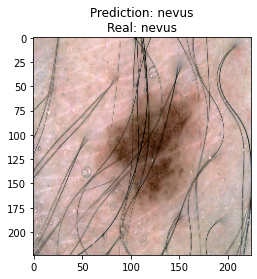

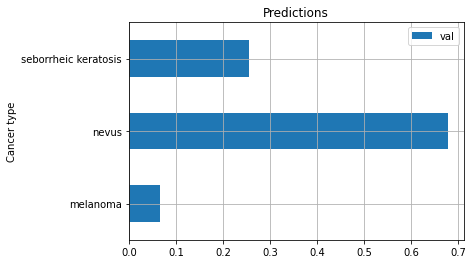

In [5]:
class_2_indices = {'melanoma': 0, 'nevus': 1, 'seborrheic_keratoses': 2}
indices_2_class = {v: k for k, v in class_2_indices.items()}

def plot_prediction(img_file, img_target, model):

    img = image.load_img(img_file, target_size=(224,224))
    img = image.img_to_array(img)/255
    img_expand = np.expand_dims(img, axis=0)
    
    # Make a prediction
    prediction = model.predict(img_expand, steps=1)
    image_idx = np.argmax(prediction[0])
    prediction_string = indices_2_class[image_idx]
    
    # Get the real label's name
    label_idx = np.argmax(img_target)
    real_label = indices_2_class[label_idx]
    
    # Plot predictions
    title = "Prediction: {}\nReal: {}".format(prediction_string, real_label)
    
    plt.imshow(img)
    plt.title(title)
    
    pred_df = pd.DataFrame({'Cancer type':['melanoma', 'nevus', 'seborrheic keratosis'], 'val':prediction[0]})
    ax = pred_df.plot.barh(x='Cancer type', y='val', title="Predictions", grid=True)
    
random_index = np.random.randint(0, len(test_data.filenames))
plot_prediction(test_filenames[random_index], test_targets[random_index], inceptionResNet_model)

In [6]:
random_index

529

In [ ]:
load_files(test_dir)

#### Matriz de confusión

[Text(0, 0.5, 'melanoma'), Text(0, 1.5, 'nevus'), Text(0, 2.5, 'keratoses')]

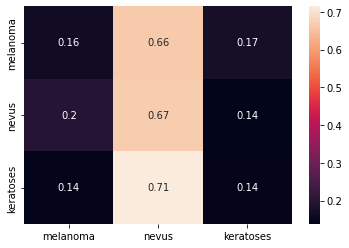

In [5]:
# Confusion matrix for all classes
y_true = test_data.classes
y_pred = [np.argmax(x) for x in predictions_inception]

labels = ["melanoma", "nevus", "keratoses"]
cm = confusion_matrix(y_true, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # Normalize confusion matrix
ax = sns.heatmap(cm, annot=True)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)